In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

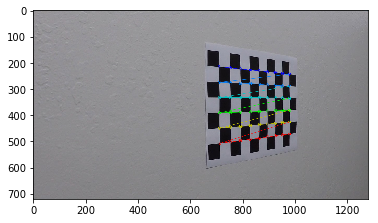

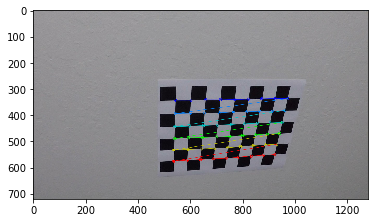

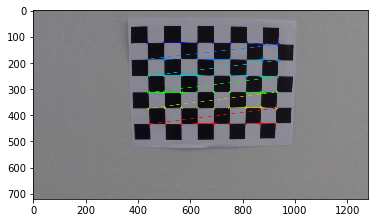

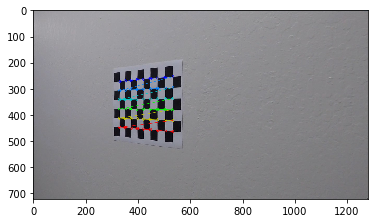

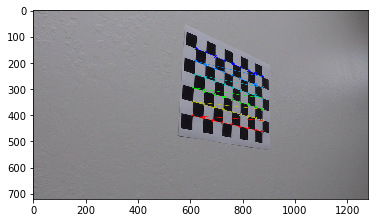

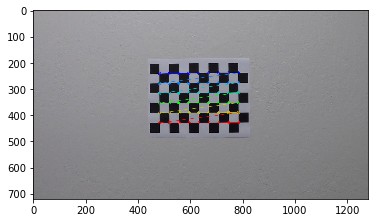

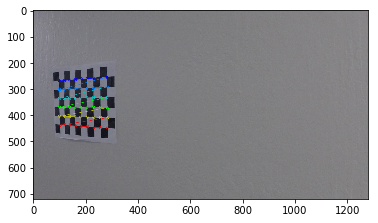

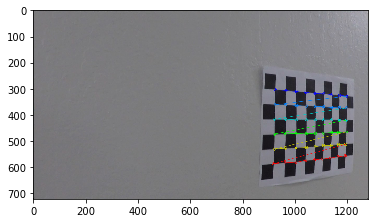

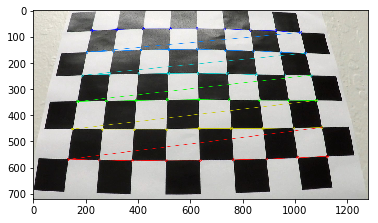

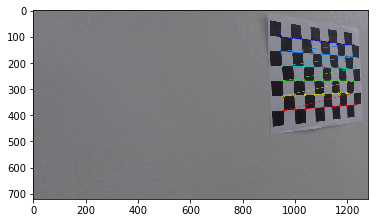

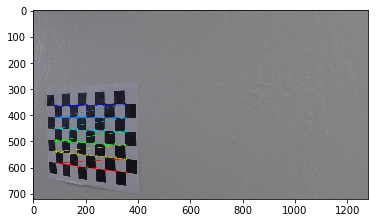

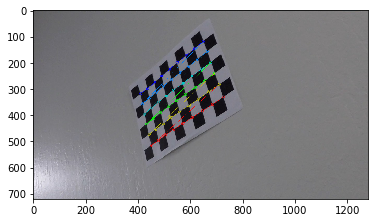

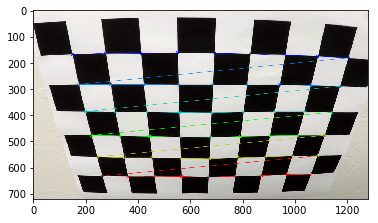

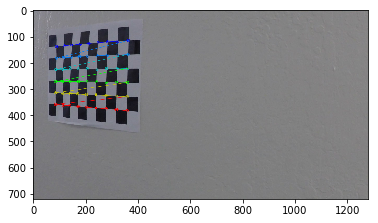

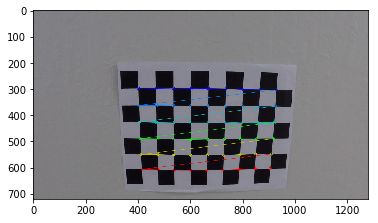

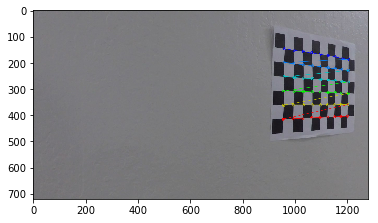

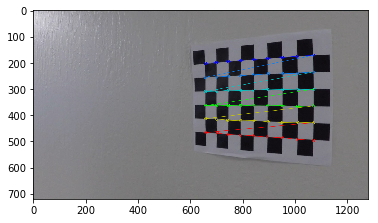

In [2]:
import glob

image_names = glob.glob('./camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) # x, y coordinates

for fname in image_names:
    # Read in image
    img = mpimg.imread(fname)
    
    # Convert img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, draw corners
    if ret == True:
        # Add points to objpoints and imgpoints arrays
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        plt.imshow(img)
        plt.show()

In [3]:
# Undistort image
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Use cv2.calibrateCamera and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

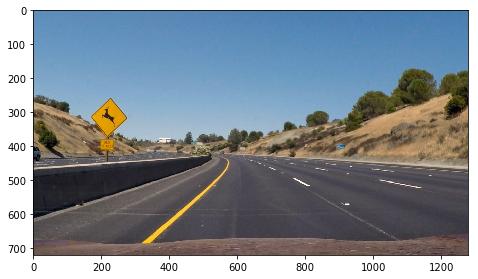

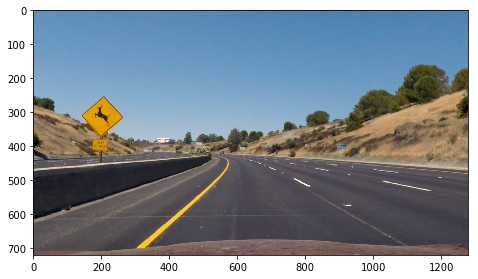

In [4]:
# Read in each image
img = mpimg.imread('./test_images/test2.jpg')
    
# Convert image to grayscale
gray_raw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
# Use cv2.calibrateCamera and cv2.undistort()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray_raw.shape, None, None)

undistorted = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(8, 4.5))
plt.imshow(img)
plt.show()
plt.figure(figsize=(8, 4.5))
plt.imshow(undistorted)
plt.show()

In [5]:
gray = cv2.cvtColor(undistorted, cv2.COLOR_RGB2GRAY)

In [6]:
# Simple grayscale gradient
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    orient_to_params = {'x': (1, 0), 'y': (0, 1)}
    sobel = np.abs(cv2.Sobel(img, cv2.CV_64F, orient_to_params[orient][0], orient_to_params[orient][1], ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*sobel/np.max(sobel))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1

    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobel = (sobel_x**2 + sobel_y**2)**0.5

    scaled_sobel = np.uint8(255*sobel/np.max(sobel))
    
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1    

    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    abs_sobel_x = np.abs(sobel_x)
    abs_sobel_y = np.abs(sobel_y)
    
    direction = np.arctan2(abs_sobel_y, abs_sobel_x)

    dir_binary = np.zeros_like(direction)
    dir_binary[(direction > thresh[0]) & (direction < thresh[1])] = 1

    return dir_binary

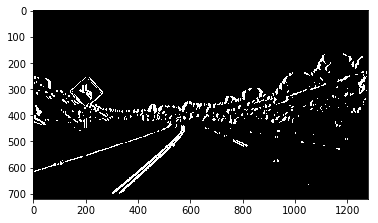

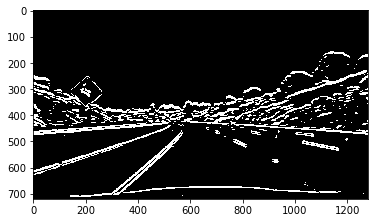

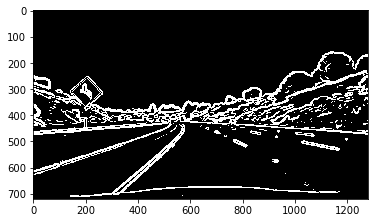

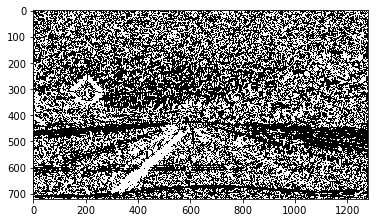

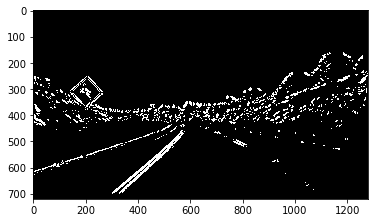

In [7]:
ksize = 31 # Choose a larger odd number to smooth gradient measurements

gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 255))
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 255))
mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(50, 255))
dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(1 * np.pi/8, 3 * np.pi/8))

combined = np.zeros_like(gray)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

plt.imshow(gradx, cmap='gray')
plt.show()
plt.imshow(grady, cmap='gray')
plt.show()
plt.imshow(mag_binary, cmap='gray')
plt.show()
plt.imshow(dir_binary, cmap='gray')
plt.show()
plt.imshow(combined, cmap='gray')
plt.show()

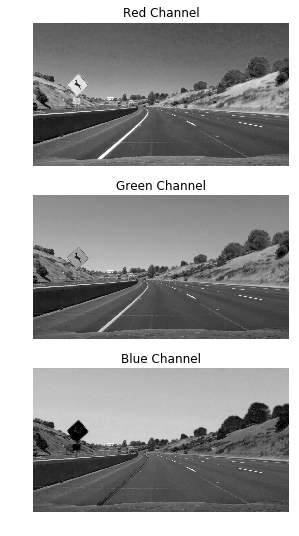

In [8]:
# Explore RGB channels
r_channel = img[:, :, 0]
g_channel = img[:, :, 1]
b_channel = img[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16, 9))
ax1.imshow(r_channel, cmap='gray')
ax1.set_title('Red Channel')
ax1.set_axis_off()
ax2.imshow(g_channel, cmap='gray')
ax2.set_title('Green Channel')
ax2.set_axis_off()
ax3.imshow(b_channel, cmap='gray')
ax3.set_title('Blue Channel')
ax3.set_axis_off()

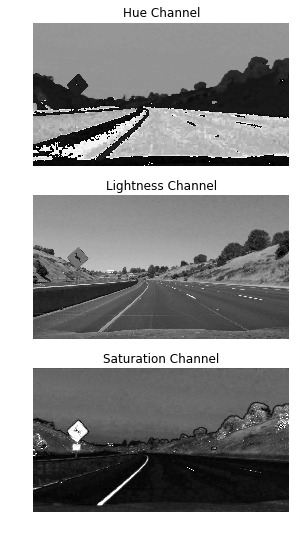

In [9]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)

h_channel = hls[:, :, 0]
l_channel = hls[:, :, 1]
s_channel = hls[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16, 9))
ax1.imshow(h_channel, cmap='gray')
ax1.set_title('Hue Channel')
ax1.set_axis_off()
ax2.imshow(l_channel, cmap='gray')
ax2.set_title('Lightness Channel')
ax2.set_axis_off()
ax3.imshow(s_channel, cmap='gray')
ax3.set_title('Saturation Channel')
ax3.set_axis_off()

Use:
1. Grayscale gradient binary, combined
2. Red channel binary
3. S channel binary
4. L channel binary

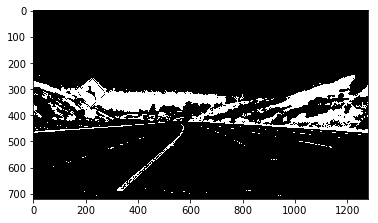

In [10]:
red_binary = np.zeros_like(r_channel)
red_binary[(r_channel > 150) & (r_channel < 255)] = 1
plt.imshow(red_binary, cmap='gray')

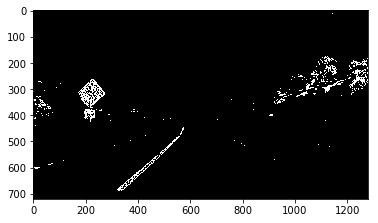

In [11]:
sat_binary = np.zeros_like(s_channel)
sat_binary[(s_channel > 120) & (s_channel < 255)] = 1
plt.imshow(sat_binary, cmap='gray')

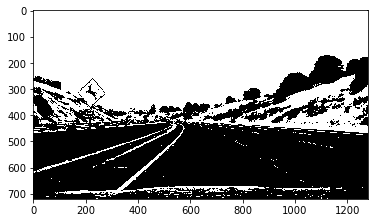

In [12]:
lit_binary = np.zeros_like(l_channel)
lit_binary[(l_channel > 110) & (l_channel < 200)] = 1
plt.imshow(lit_binary, cmap='gray')

In [13]:
combine_all = np.zeros_like(combined)
combine_all[((sat_binary == 1) | (lit_binary == 1)| (combined == 1)) | (red_binary == 1) ] = 1

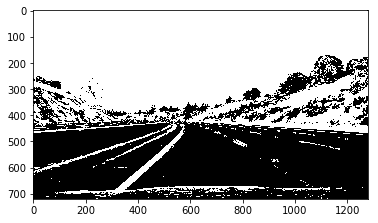

In [14]:
plt.imshow(combine_all, cmap='gray')
plt.show()

(720, 1280)


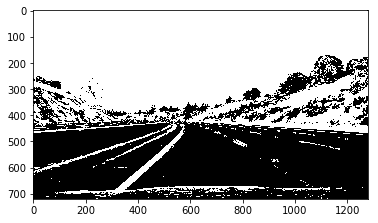

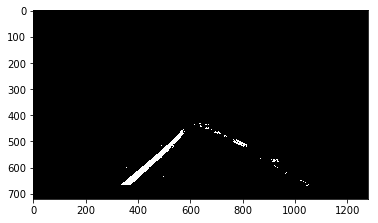

In [15]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

imshape = combine_all.shape
print(imshape)
# Mask the img and get region of interst
poly = np.array([[(imshape[1] * 4/20, imshape[0] * 37/40),(imshape[1] * 19/40, imshape[0] *12/20), (imshape[1] * 21/40, imshape[0]*12/20), (imshape[1]* 29/30, imshape[0]* 28/30)]], dtype=np.int32)
masked_image = region_of_interest(combine_all, poly)

plt.imshow(combine_all, cmap='gray')
plt.show()
plt.imshow(masked_image, cmap='gray')
plt.show()

In [99]:
def perspective_transform(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
        [[767, 500], # Top right
         [1038, 671],# Bottom right
         [283, 671], # Bottom left
         [521, 500]  # Top left           
        ]
    )

    offset = 160
    dst = np.float32(
        [[900, 160],
         [900, img_size[1]],
         [300, img_size[1]],
         [300, 160]
        ]
    )
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return M, Minv, warped

In [197]:
def pipeline(img, objpoints, imgpoints, kernel_size=31):
    """
    Masks used:
    1. Grayscale gradient binary, combined
    2. Red channel binary
    3. S channel binary
    4. L channel binary
    5. Combine 1~4
    6. Apply mask to mark the region of interest
    """
    # Grayscale combined
    ksize = kernel_size

    gray_raw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Use cv2.calibrateCamera and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray_raw.shape, None, None)

    img = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(img)
    plt.show()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 255))
    grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 255))
    mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(50, 255))
    dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(1 * np.pi/8, 3 * np.pi/8))

    combined = np.zeros_like(gray)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
#     plt.imshow(combined)
#     plt.show()
    
    # Get red binary
    r_channel = img[:, :, 0]
    g_channel = img[:, :, 1]
    b_channel = img[:, :, 2]
    
    red_binary = np.zeros_like(r_channel)
    red_binary[(r_channel > 150) & (r_channel < 255)] = 1
    
    # Get saturation/lightness binary
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    
    h_channel = hls[:, :, 0]
    l_channel = hls[:, :, 1]
    s_channel = hls[:, :, 2]
    
    sat_binary = np.zeros_like(s_channel)
    sat_binary[(s_channel > 120) & (s_channel < 255)] = 1
#     plt.imshow(sat_binary)
#     plt.show()
    
    lit_binary = np.zeros_like(l_channel)
    lit_binary[(l_channel > 110) & (l_channel < 200)] = 1
    
    # Stack of sat_binary and combined
    color_binary = np.dstack((np.zeros_like(s_channel), sat_binary, combined))
    plt.imshow(color_binary)
    plt.show()
    
    # Combine all binaries
    combine_all = np.zeros_like(combined)
#     combine_all[((sat_binary == 1) | (lit_binary == 1)| (combined == 1)) | (red_binary == 1) ] = 1
    combine_all[((sat_binary == 1) | (combined == 1))] = 1

    # Apply mask
#     imshape = combine_all.shape
    # Mask the img and get region of interst
#     poly = np.array([[(imshape[1] * 4/20, imshape[0] * 37/40),(imshape[1] * 19/40, imshape[0] *12/20), (imshape[1] * 21/40, imshape[0]*12/20), (imshape[1]* 29/30, imshape[0]* 28/30)]], dtype=np.int32)
#     masked_image = region_of_interest(combine_all, poly)
    
    M, Minv, warped = perspective_transform(combine_all)
    
    warped[(warped > 0)] = 1
    
    # Cropping
    warped[:, :150] = 0
    warped[:, warped.shape[1] - 150:] = 0
    
    plt.imshow(warped, cmap='gray')
    plt.show()
    
    return M, Minv, warped

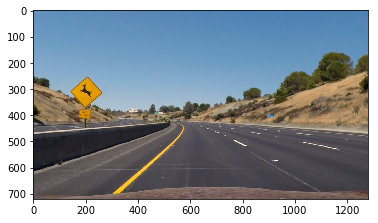

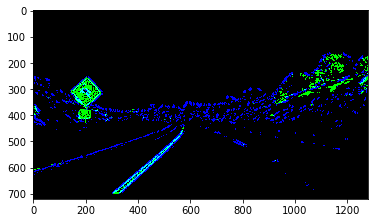

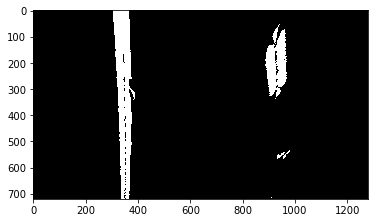

In [246]:
test = plt.imread('./test_images/test2.jpg')

M, Minv, binary_warped = pipeline(test, objpoints, imgpoints)

/home/calvinjku/anaconda3/envs/CarND-Term1/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


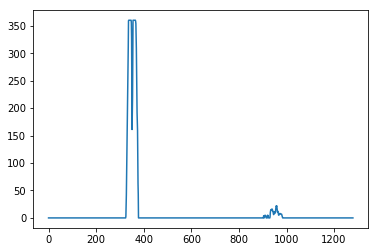

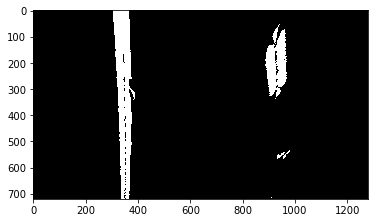

(720, 0)

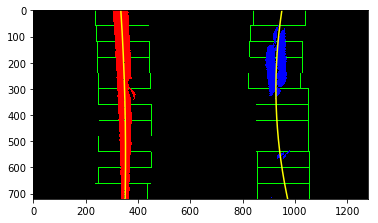

In [247]:
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
plt.plot(histogram)
plt.show()

out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
plt.imshow(out_img)
plt.show()

midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 12
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base

# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        
# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# At this point, you're done! But here is how you can visualize the result as well:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)



(720, 0)

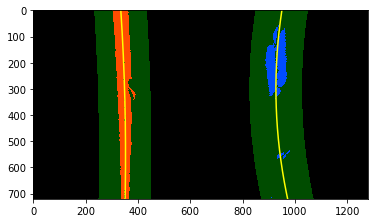

In [248]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
# And you're done! But let's visualize the result here as well
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [249]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

8520.13067401 2110.52144374


In [250]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

2796.90991701 m 649.516615278 m


(720, 1280, 3)


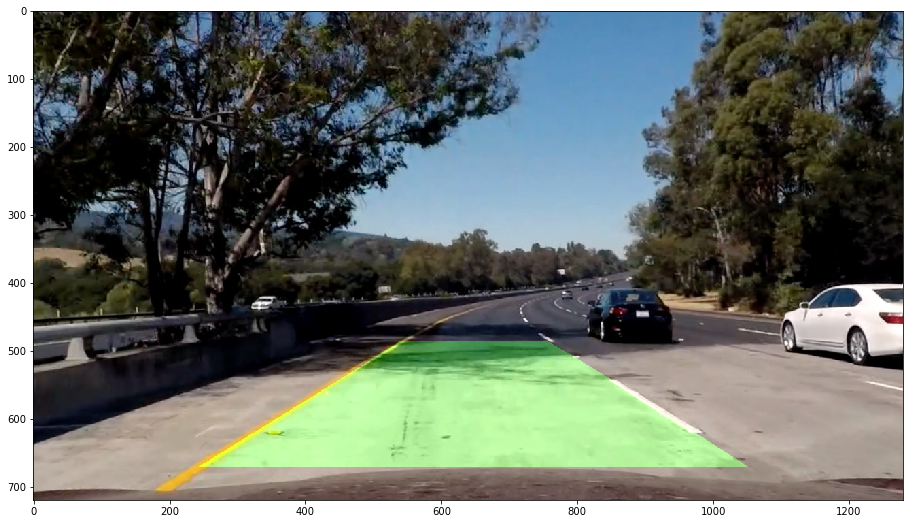

In [238]:
gray_raw = cv2.cvtColor(test, cv2.COLOR_RGB2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray_raw.shape, None, None)
undist = cv2.undistort(test, mtx, dist, None, mtx)
    
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
print(color_warp.shape)
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (test.shape[1], test.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.figure(figsize=(16, 9))
plt.imshow(result)

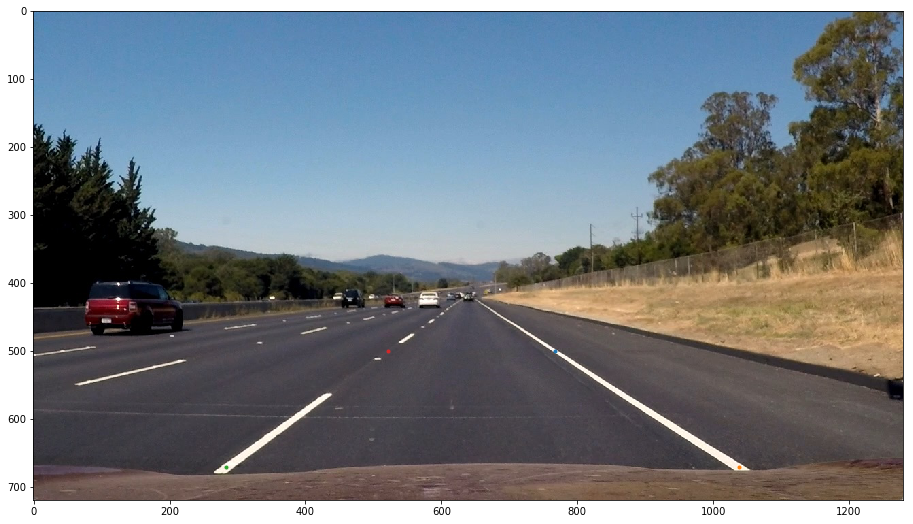

In [208]:
sample_image = plt.imread('./test_images/straight_lines2.jpg')
plt.figure(figsize=(16, 9))
plt.imshow(sample_image)
plt.plot(767, 500, '.') # Top right
plt.plot(1038, 671, '.') # Bottom right
plt.plot(283, 671, '.') # Bottom left
plt.plot(521, 500, '.') # Top left

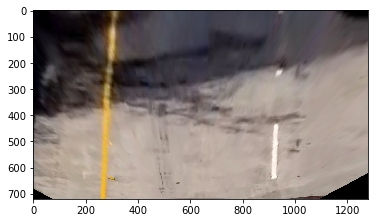

In [101]:
_, _, warped = perspective_transform(test)
plt.imshow(warped)

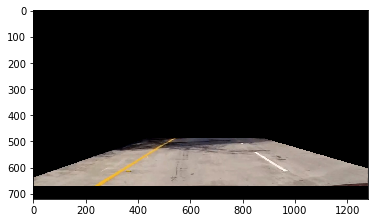

In [94]:
_, Minv, warped = transform_from_sample(sample_image, test)
unwarped = cv2.warpPerspective(warped, Minv, (warped.shape[1], warped.shape[0]), flags=cv2.INTER_LINEAR)

plt.imshow(unwarped)